In [15]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


# Read the web scrapped file, transform same values and start to apply Machine Learning
import pandas as pd
import os
import statsmodels.formula.api as sm
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn import grid_search
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn import metrics
%matplotlib inline

In [4]:
def leo_ini():
    import os
    script_dir = os.path.dirname(__file__)
    f1 = open(os.path.join(script_dir,"ini.txt"), 'r')
    lineas=f1.readlines()
    for k in lineas:
        if k.find("ruta") != -1:
            ruta_final = k.split("=")[1]
    return ruta_final
    
#ruta = leo_ini()   

df = pd.read_csv("temporadas.csv", sep = ',')
print df.head()


  temporada                  equipo  puesto  PJ  PG  PP    PF    PC  \
0     15-16      FC Barcelona Lassa       1  34  29   5  2835  2384   
1     15-16             Real Madrid       2  34  29   5  3229  2767   
2     15-16    Valencia Basket Club       3  34  28   6  2831  2501   
3     15-16  Laboral Kutxa Baskonia       4  34  24  10  2987  2703   
4     15-16  Herbalife Gran Canaria       5  34  21  13  2818  2705   

   total_min  total_val  total_puntos  total_min_espana  total_puntos_espana  \
0       6841       2255          2835              1516                  679   
1       6816       2310          3229              2710                 1310   
2       6868       1650          2831              2388                  888   
3       6841       1420          2987               366                  127   
4       6843        565          2818              1975                  737   

   total_val_espana  total_jug  jug_esp  jug1  jug3  jug5  mas5  
0               624       

In [5]:
df["porcentaje_jug_esp"] = df["jug_esp"]/df["total_jug"]
df["porcentaje_jug_1"] = df["jug1"]/df["total_jug"]
df["porcentaje_jug_3"] = df["jug3"]/df["total_jug"]
df["porcentaje_jug_5"] = df["jug5"]/df["total_jug"]
df["porcentaje_jug_mas5"] = df["mas5"]/df["total_jug"]
df["total_min_no_esp"] = df["total_min"]-df["total_min_espana"]
df["porcentaje_min_esp"]= df["total_min_espana"]/df["total_min"]
df["porcentaje_min_no_esp"]= df["total_min_no_esp"]/df["total_min"]
df["total_puntos_no_esp"] = df["total_puntos"]-df["total_puntos_espana"]
df["porcentaje_puntos_esp"]= df["total_puntos_espana"]/df["total_puntos"]
df["porcentaje_puntos_no_esp"]= df["total_puntos_no_esp"]/df["total_puntos"]
df["total_val_no_esp"] = df["total_val"]-df["total_val_espana"]
df["porcentaje_val_esp"]= df["total_val_espana"]/df["total_val"]
df["porcentaje_val__no_esp"]= df["total_val_no_esp"]/df["total_val"]

# Reviewing the data

df.describe()



,puesto,PJ,PG,PP,PF,PC,total_min,total_val,total_puntos,total_min_espana,...,porcentaje_jug_mas5,total_min_no_esp,porcentaje_min_esp,porcentaje_min_no_esp,total_puntos_no_esp,porcentaje_puntos_esp,porcentaje_puntos_no_esp,total_val_no_esp,porcentaje_val_esp,porcentaje_val__no_esp
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,...,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,9.989775,33.877301,16.938650,16.938650,2667.008180,2667.008180,6808.245399,2183.443763,2667.325153,2907.973415,...,0.049534,3900.271984,0.426880,0.573120,1685.220859,0.367321,0.632679,1391.983640,0.380709,0.619291
std,5.592176,1.821231,5.762399,5.762399,216.377346,211.729761,371.318350,1169.696446,216.430654,1040.317213,...,0.073135,1030.535804,0.149772,0.149772,384.892789,0.139199,0.139199,799.874409,0.363212,0.363212
min,1.000000,28.000000,3.000000,2.000000,2092.000000,2071.000000,5594.000000,-3415.000000,2092.000000,366.000000,...,0.000000,1867.000000,0.053501,0.273874,764.000000,0.033940,0.294565,-2725.000000,-1.100000,-5.300000
25%,5.000000,34.000000,13.000000,13.000000,2533.000000,2530.000000,6794.000000,2272.000000,2533.000000,2110.000000,...,0.000000,3136.000000,0.310650,0.461799,1411.000000,0.265557,0.524964,1210.000000,0.258887,0.533853
50%,10.000000,34.000000,16.000000,18.000000,2650.000000,2651.000000,6819.000000,2564.000000,2650.000000,2926.000000,...,0.000000,3820.000000,0.443532,0.556468,1681.000000,0.370986,0.629014,1583.000000,0.357727,0.642273
75%,15.000000,34.000000,21.000000,21.000000,2770.000000,2786.000000,6846.000000,2814.000000,2775.000000,3703.000000,...,0.076923,4734.000000,0.538201,0.689350,1959.000000,0.475036,0.734443,1860.000000,0.466147,0.741113
max,24.000000,38.000000,32.000000,31.000000,3399.000000,3436.000000,7793.000000,3563.000000,3399.000000,4950.000000,...,0.437500,6475.000000,0.726126,0.946499,2860.000000,0.705435,0.966060,2957.000000,6.300000,2.100000


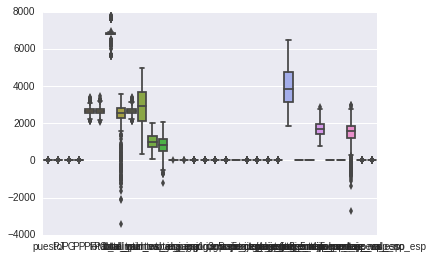

In [6]:
correlaciones = df.corr()
jugadores = ["jug1", "jug3", "jug5", "mas5"]
correlaciones[jugadores]
sns.boxplot(data=df[jugadores])
correlaciones[(correlaciones <= -0.5) & (correlaciones >= 0.5) & (correlaciones != 1)] #comprobamos si las correlaciones son mayores que 0,5
sns.boxplot(data = df)



In [7]:
print 'RESULTADOS  REGRESION LINEAL' 

print ' -------------------------------------------------------------------------------------------------------------------------------------------'
result = sm.ols(formula="puesto ~ jug_esp + jug1 +jug3 + jug5 + mas5 + total_min_espana + total_min_no_esp + total_puntos + total_puntos_espana + total_puntos_no_esp", data=df).fit()
print result.params
print result.summary()
result2 = sm.ols(formula="puesto ~ jug_esp + jug1 +jug3 + jug5 + mas5 + total_min_espana + total_min_no_esp + total_puntos + total_puntos_espana + total_puntos_no_esp", data=df).fit()
df.to_csv("D:\\Master\\ProyectoBasket\\Proyecto-Kschool-Basket\\temporadas_totalizado.csv", index=False)
result3 = sm.ols(formula="puesto ~ jug1 +jug3 + jug5 + porcentaje_jug_esp + porcentaje_min_esp", data=df).fit()
print result3.summary()
##  

print ' -------------------------------------------------------------------------------------------------------------------------------------------'


RESULTADOS  REGRESION LINEAL
 -------------------------------------------------------------------------------------------------------------------------------------------
Intercept              10.848414
jug_esp                 0.405351
jug1                    0.489548
jug3                   -0.251534
jug5                    0.395635
mas5                   -0.020442
total_min_espana        0.009138
total_min_no_esp        0.004501
total_puntos           -0.012673
total_puntos_espana    -0.012277
total_puntos_no_esp    -0.000396
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 puesto   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     57.74
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           7.42e-71
Time:                        00:48:07   Log-Likelihood:  

#
### It seems that ther regression doesn't work we'll try to build a classification method. Though the position are numbers we can understand it like categories with values from 1 to 26. 
#



In [8]:
# Scaling the values , I'm going to select the numeric columns in the dataframe
columnas_numericas = ["PJ", "PG", "PP", "PF", "PC", "total_min", "total_val", "total_puntos", \
        "total_min_espana","total_puntos_espana", "total_val_espana", "total_jug", "jug_esp",\
       "jug1", "jug3", "jug5", "mas5", "porcentaje_jug_esp",\
       "porcentaje_jug_1", "porcentaje_jug_3", "porcentaje_jug_5",\
       "porcentaje_jug_mas5", "total_min_no_esp", "porcentaje_min_esp",\
       "porcentaje_min_no_esp", "total_puntos_no_esp",\
       "porcentaje_puntos_esp", "porcentaje_puntos_no_esp",\
       "total_val_no_esp", "porcentaje_val_esp", "porcentaje_val__no_esp"]

df_numerico = df[columnas_numericas]
clf = svm.SVC()
df_numerico = df_numerico.apply(lambda x: preprocessing.scale(x))
# adding target column 
df_numerico["puesto"] =df["puesto"]
# deleting PG and PP because we can't modify this values with people selection or behaviour. 
df_numerico = df_numerico.drop(labels="PG", axis=1)
df_numerico = df_numerico.drop(labels="PP", axis=1)

/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [9]:
# Generating train and test subsets. If the accuracy is enough we'll use for control season that are not in the data (later 2016)
X_train, X_test, y_train, y_test = train_test_split(df_numerico[jugadores],df_numerico["puesto"],test_size=0.2,random_state=0)
C = 1.0  # SVM regularization parameter
# Model creation with only players by years in the league. Must be interesting for the result
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
lista = [svc, rbf_svc,poly_svc,lin_svc]
listado = ["svc", "rbf_svc","poly_svc","lin_svc"]
contador = 0
print 'RESULTADOS  Accuracy SVM' 

print ' -------------------------------------------------------------------------------------------------------------------------------------------'

for k in lista:
    clf_svm = k
    clf_svm.fit(X_train, y_train)
    y_pred_svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    print "accuracy %s: "%listado[contador],acc_svm
    contador = contador +1


RESULTADOS  Accuracy SVM
 -------------------------------------------------------------------------------------------------------------------------------------------
accuracy svc:  0.0102040816327
accuracy rbf_svc:  0.0510204081633
accuracy poly_svc:  0.0612244897959
accuracy lin_svc:  0.0408163265306



#accuraccy is completely inefficient 



In [10]:
# Model building adding other variables

valores = ["PF", "PC", "total_min", "total_val","jug1", "jug3", "jug5", "mas5","total_jug","total_val_no_esp", "porcentaje_val_esp", "total_min_no_esp", "porcentaje_min_esp"]
X_train, X_test, y_train, y_test = train_test_split(df_numerico[valores],df_numerico["puesto"],test_size=0.2,random_state=0)
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
lista = [svc, rbf_svc,poly_svc,lin_svc]
listado = ["svc", "rbf_svc","poly_svc","lin_svc"]
contador = 0
for k in lista:
    clf_svm = k
    clf_svm.fit(X_train, y_train)
    y_pred_svm = clf_svm.predict(X_test)
    acc_svm = accuracy_score(y_test, y_pred_svm)
    print "accuracy %s: "%listado[contador],acc_svm
    contador = contador +1
print ' -------------------------------------------------------------------------------------------------------------------------------------------'




accuracy svc:  0.102040816327
accuracy rbf_svc:  0.0510204081633
accuracy poly_svc:  0.0510204081633
accuracy lin_svc:  0.0510204081633
 -------------------------------------------------------------------------------------------------------------------------------------------


# Better accuracy but still far from acceptables values 



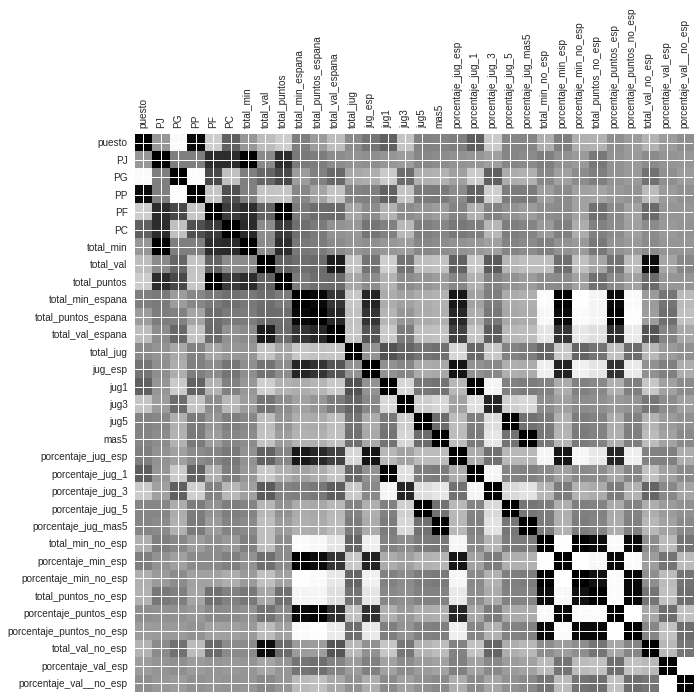

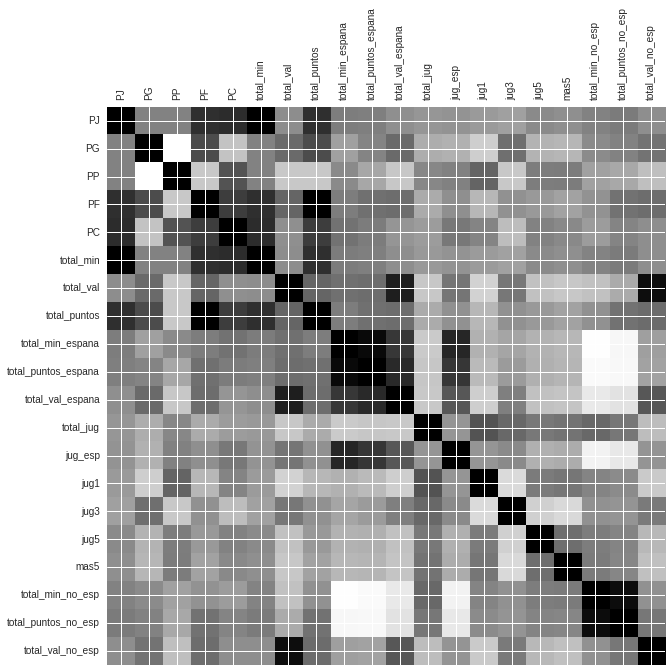

In [11]:

# I will try, as suggested, with PCA. Let's see what are the results.

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
    df: pandas DataFrame
    size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
columnas_sin_pct = ["PJ", "PG", "PP", "PF", "PC", "total_min", "total_val", "total_puntos", "total_min_espana","total_puntos_espana", "total_val_espana", "total_jug", "jug_esp",\
       "jug1", "jug3", "jug5", "mas5", \
       "total_min_no_esp", "total_puntos_no_esp",\
       "total_val_no_esp"]
otro_df = df[columnas_sin_pct]

plot_corr(df)
plot_corr(otro_df) 

#deleting percentages because it is usual that have high correlation in fact this is a calculation from the original number



In [12]:

# we'll try to use PCA to obtain better results.

valores2 = ["PF", "PC", "total_val","porcentaje_jug_esp",\
       "porcentaje_jug_1", "porcentaje_jug_3", "porcentaje_jug_5",\
       "porcentaje_jug_mas5", "porcentaje_min_esp", "porcentaje_val_esp"\
       ]

# A first View
import numpy as np
from sklearn.decomposition import PCA  
DATA = df_numerico[valores2].values
my_model = PCA(n_components=4)
my_model.fit_transform(DATA)

print df[valores2].columns
print my_model.explained_variance_
print my_model.explained_variance_ratio_
print my_model.explained_variance_ratio_.cumsum()


Index([u'PF', u'PC', u'total_val', u'porcentaje_jug_esp', u'porcentaje_jug_1',
       u'porcentaje_jug_3', u'porcentaje_jug_5', u'porcentaje_jug_mas5',
       u'porcentaje_min_esp', u'porcentaje_val_esp'],
      dtype='object')
[ 3.02956721  1.91253604  1.47588302  1.00650634]
[ 0.30295672  0.1912536   0.1475883   0.10065063]
[ 0.30295672  0.49421032  0.64179863  0.74244926]


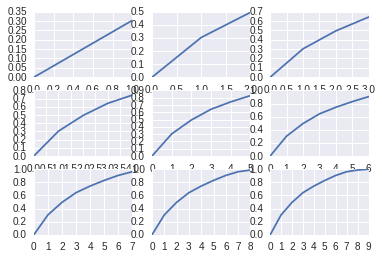

In [13]:

# Let's try to identify the best approach n_components
lista_valores_PCA = []
def genero_PCA(componentes):
    my_model = PCA(n_components=componentes)
    my_model.fit_transform(DATA)
    valores = np.insert(my_model.explained_variance_ratio_.cumsum(),0,0)
    return valores
lista_comp =[0]
plt.figure()
pos_H = 0
pos_V = 0
for x in range(1,10):
    componentes = x
    lista_comp.append(x)
    y = genero_PCA(componentes)
    plt.subplot2grid((3, 3), (pos_H, pos_V))
    plt.plot(lista_comp,y)
    if x%3 ==0 :
        pos_V = 0
        pos_H = pos_H + 1
    else:
        pos_V = x%3
plt.show()  



In [14]:
print "VALORES REGRESION LINEAL tras PCA"
print ' -------------------------------------------------------------------------------------------------------------------------------------------'
      
valores_PCA = my_model.fit_transform(DATA)
result_PCA = sm.OLS(df_numerico["puesto"], valores_PCA).fit()
print result_PCA.summary()

print ' -------------------------------------------------------------------------------------------------------------------------------------------'



VALORES REGRESION LINEAL tras PCA
 -------------------------------------------------------------------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 puesto   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     10.10
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           7.40e-08
Time:                        00:54:49   Log-Likelihood:                -1866.3
No. Observations:                 489   AIC:                             3741.
Df Residuals:                     485   BIC:                             3757.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err   

# We remove the multicollinearity but the R squared is still very low. 

# Next step Random Forest.



In [17]:

clf = RandomForestClassifier(n_jobs=700)
clf.fit(X_train, y_train)
clf.feature_importances_
importance_sum = sum(clf.feature_importances_)
feat_imp_perct =  [100*(x/importance_sum) for x in clf.feature_importances_]
print feat_imp_perct


[10.576985652666163, 11.773064734467951, 8.5052388766819664, 11.191618306332622, 5.1738153257222166, 6.5742938944264822, 3.4128223632466472, 2.5769755209238219, 6.1256175707873703, 8.7320896765011042, 9.7140238477831868, 7.9025940076439385, 7.7408602228165506]


In [18]:
param_grid = {
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [3, 4, 6, 7]
             }
grid_clf = grid_search.GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
grid_clf. best_estimator_
grid_clf. best_params_
grid_clf. grid_scores_
print grid_clf. best_estimator_


/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=700, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


                    importance
feature                       
PC                       0.118
total_val                0.112
PF                       0.106
porcentaje_val_esp       0.097
total_val_no_esp         0.087
total_min                0.085
total_min_no_esp         0.079
porcentaje_min_esp       0.077
jug3                     0.066
total_jug                0.061
jug1                     0.052
jug5                     0.034
mas5                     0.026


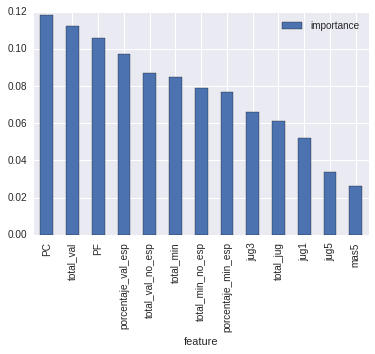

In [19]:
best_clf = grid_clf. best_estimator_
best_clf.fit(X_train, y_train)
pred = best_clf.predict(X_test)
# testing score
pred = best_clf.predict(X_test)
clf.feature_importances_
importance_sum = sum(clf.feature_importances_)
feat_imp_perct =  [100*(x/importance_sum) for x in clf.feature_importances_]
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print importances
importances.plot.bar()



In [20]:
PredOutputs = best_clf.predict(X_train)
# testing score
score = metrics.f1_score(y_test, pred,average='micro', pos_label=list(set(y_test)))
# training score
score_train = metrics.f1_score(y_train, PredOutputs ,average='micro', pos_label=list(set(y_train)))

print 'RESULTADOS RANDOM FOREST'
print ' -------------------------------------------------------------------------------------------------------------------------------------------'

print "f1 score with test data:", score
print "f1 score with train data:", score_train

print ' -------------------------------------------------------------------------------------------------------------------------------------------'



RESULTADOS RANDOM FOREST
 -------------------------------------------------------------------------------------------------------------------------------------------
f1 score with test data: 0.0714285714286
f1 score with train data: 0.450127877238
 -------------------------------------------------------------------------------------------------------------------------------------------


/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1023: UserWarning: Note that pos_label (set to [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23]) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1023: UserWarning: Note that pos_label (set to [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# lo que vamos a hacer es bajar la sensibilidad del ajuste. Es decir no queremos saber el puesto exacto si no si jugará playoff, descenderá o quedará en medio (clasificación)



In [35]:
def puesto(x):
    if x <= 8: x= "playoff"
    elif x >8 and x <=16: x="clasificacion"
    else: x = "descenso"
    return x
    
df_numerico["sub_puesto"] = df_numerico["puesto"].apply(lambda x: puesto(x))



In [36]:
X_train, X_test, y_train, y_test = train_test_split(df_numerico[valores2],df_numerico["sub_puesto"],test_size=0.2,random_state=0)

param_grid = {
                 'n_estimators': [50, 100, 150, 200],
                 'max_depth': [3, 4, 6, 7]
             }
grid_clf = grid_search.GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
grid_clf. best_estimator_
grid_clf. best_params_
grid_clf. grid_scores_
print grid_clf. best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=700, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [37]:
best_clf = grid_clf. best_estimator_
best_clf.fit(X_train, y_train)
pred = best_clf.predict(X_test)
# testing score
pred = best_clf.predict(X_test)
PredOutputs = best_clf.predict(X_train)
# testing score
score = metrics.f1_score(y_test, pred,average='micro', pos_label=list(set(y_test)))
# training score
score_train = metrics.f1_score(y_train, PredOutputs ,average='micro', pos_label=list(set(y_train)))

print 'RESULTADOS RANDOM FOREST con baja sensibilidad'
print ' -------------------------------------------------------------------------------------------------------------------------------------------'

print "f1 score with test data:", score
print "f1 score with train data:", score_train

print ' -------------------------------------------------------------------------------------------------------------------------------------------'


RESULTADOS RANDOM FOREST con baja sensibilidad
 -------------------------------------------------------------------------------------------------------------------------------------------
f1 score with test data: 0.734693877551
f1 score with train data: 0.928388746803
 -------------------------------------------------------------------------------------------------------------------------------------------


/home/dsc/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1023: UserWarning: Note that pos_label (set to ['descenso', 'playoff', 'clasificacion']) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [38]:
cm = confusion_matrix(y_train.sample(98), y_test)
print cm


[[24  6 18]
 [ 3  1  6]
 [19  4 17]]


[[20 23  2]
 [15 18  9]
 [ 6  5  0]]


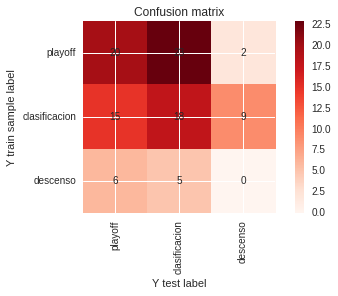

In [39]:

labels = ['playoff', 'clasificacion','descenso']
cm = confusion_matrix(y_train.sample(98), y_test, labels)
print(cm)
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    width, height = cm.shape
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('Y train sample label')
    plt.xlabel('Y test label')

plot_confusion_matrix(cm, labels)
plt.show()  


                     importance
feature                        
total_val                 0.231
PC                        0.223
PF                        0.177
porcentaje_jug_esp        0.078
porcentaje_jug_3          0.076
porcentaje_min_esp        0.068
porcentaje_val_esp        0.055
porcentaje_jug_1          0.052
porcentaje_jug_mas5       0.024
porcentaje_jug_5          0.017


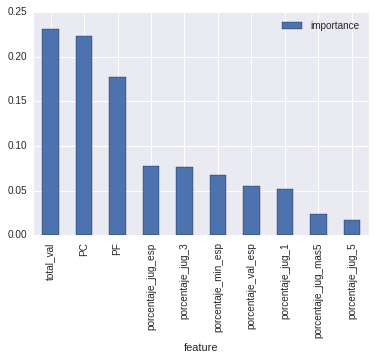

In [40]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(best_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print importances
importances.plot.bar()
